In [1]:
import re
import pandas as pd
from datetime import datetime

In [58]:
f=open('_chat.txt','r',encoding='utf-8')

In [59]:
data=f.read()

In [38]:
#print(data)

In [60]:
pattern = r"\[(\d{2}/\d{2}/\d{2}, \d{1,2}:\d{2}:\d{2} ?[APM]{2})\] ([^:]+):\s?(.+)"

# Extract matches
matches = re.findall(pattern, data)

formatted_data = []
for timestamp, user, message in matches:
    timestamp = re.sub(r' ', '', timestamp)  # Remove hidden Unicode spaces
    date_time_obj = datetime.strptime(timestamp, "%d/%m/%y, %I:%M:%S%p")
    
    formatted_data.append([
        date_time_obj.strftime("%d/%m/%y %H:%M:%S"),  # Full Date & Time in 24-hour format
        date_time_obj.strftime("%Y"),  # Extract Year
        date_time_obj.strftime("%B"),  # Extract Month (Full Name)
        date_time_obj.strftime("%A"),  # Extract Day (Weekday Name)
        date_time_obj.strftime("%H"),  # Extract Hour (24-hour format)
        date_time_obj.strftime("%M"),  # Extract Minute
        user.strip(),
        message.strip()
    ])

# Convert to DataFrame
df = pd.DataFrame(formatted_data, columns=["Date & Time", "Year", "Month", "Day", "Hour", "Minute", "User", "Message"])

In [8]:
df.sample()

,Date & Time,Year,Month,Day,Hour,Minute,User,Message
5183,12/12/24 08:03:44,2024,December,Thursday,08,03,Nirman Patel(dj),"F.Y.B.Tech, First Year, Sem-I, Regular Examina..."


In [66]:
system_messages = [
    "Media omitted",
    "image omitted",
    "This message was deleted",
    "added", "removed", "left",
    "changed the subject",
    "changed this group’s icon",
    "Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them"
]

# Remove system messages from df['Message ']
df = df[~df["Message"].str.contains("|".join(system_messages), na=False, case=False)]
unwanted_phrases = [
    "joined using this group's invite link",
    "left",
    "changed the group name",
    "changed this group’s icon",
    "added",
    "removed",
    "You're now an admin",
    "Media omitted",
    "This message was deleted"
]

# Remove rows where 'Message' contains any of the unwanted phrases
df= df[~df["Message"].str.contains('|'.join(unwanted_phrases), na=False)]


In [62]:
df['Message'][0]

'\u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.'

In [67]:
df.head(15)

,Date & Time,Year,Month,Day,Hour,Minute,User,Message
13,20/09/24 11:31:24,2024,September,Friday,11,31,~ Krish,CSE (DS) DIV D3 CHEM AUTOCAD ECS.pdf • ‎1 page...
45,20/09/24 13:35:32,2024,September,Friday,13,35,Keval Shah(dj),Follow this link to join my WhatsApp group: ht...
46,20/09/24 13:35:47,2024,September,Friday,13,35,Keval Shah(dj),Join D3-3
50,20/09/24 13:56:05,2024,September,Friday,13,56,Nitesh Thakur(dj),Kidhar hai lecture????
51,20/09/24 13:56:23,2024,September,Friday,13,56,~ Lavesh,in the lab opp class 21
61,20/09/24 15:23:49,2024,September,Friday,15,23,~ Krish,WATER PPT (Sept-2023).pdf • ‎53 pages ‎docume...
62,20/09/24 15:24:04,2024,September,Friday,15,24,~ Krish,Matrices by Dr. Naresh Vasant Afre Shareable 2...
63,20/09/24 15:25:02,2024,September,Friday,15,25,~ Lavesh,#krishforCR guys
64,20/09/24 15:26:14,2024,September,Friday,15,26,~ Neil Mhatre,+1
66,20/09/24 15:34:26,2024,September,Friday,15,34,Nitesh Thakur(dj),Hamara cr kaisa ho??


In [42]:
x=df[df["User"]=="Aryan Mirchandani(dj)"]
x['Message'].value_counts()

Message
Guys                                              4
Sort                                              4
??                                                3
Okay                                              3
Haa                                               2
                                                 ..
wahhh                                             1
can someone send the timetable of the tt again    1
hopefully                                         1
but its not come ab tak                           1
last yr ka hai yeh                                1
Name: count, Length: 304, dtype: int64

In [9]:
df[df["User"]=="Ronak Shukla"].shape

(3, 8)

In [10]:
words=[]
for message in df['Message']:
    words.extend(message.split())
    
    

In [11]:
#words

In [12]:
len(words)

32013

In [11]:
Message=df['Message']

In [14]:
!pip install urlextract

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from urlextract import URLExtract

def extract_urls(text):
    extractor = URLExtract()
    return extractor.find_urls(text)



In [16]:
link=[]
for messages in df['Message']:
    link.extend(extract_urls(messages))

In [17]:
link

['https://chat.whatsapp.com/DnVNMN7QvLN6rbUZouMtTp',
 'https://chat.whatsapp.com/I9wTtI2Wv6n1pfb1YTA9NM',
 'https://chat.whatsapp.com/IEzRHXCvyyB00xFW2I6ec9',
 'https://chat.whatsapp.com/DMCIhJ02pDnGnLGSuAF4PQ',
 'https://chat.whatsapp.com/LeCCpTpSHZTBlmD0vOpxP4',
 'https://chat.whatsapp.com/DkErLUbFdY1LQ4hsRDpxQt',
 'https://chat.whatsapp.com/I9wTtI2Wv6n1pfb1YTA9NM',
 'https://www.instagram.com/p/DAWOIj_sfWp/?igsh=bGpreDUzbG1rZGg2',
 'https://chat.whatsapp.com/DMCIhJ02pDnGnLGSuAF4PQ',
 'https://chat.whatsapp.com/D3Zi4bdMU9UBYaJRHzCStB',
 'https://www.instagram.com/reel/DAi-4yAC1Rf/?igsh=MWEybXdybGpmdGt1cg==',
 'https://abc.digilocker.gov.in/nabc/studentdashboard',
 'https://forms.gle/nkc95NbCQi1oH3x26',
 'https://youtu.be/F5_wpBnWWAs?si=8NOU3S_pweWJtLY1',
 'https://youtu.be/F5_wpBnWWAs?si=8NOU3S_pweWJtLY1',
 'https://chat.whatsapp.com/LPTEMS1dqFs4ly6JEUADm9',
 'https://docs.google.com/forms/d/1w0y03VpWwJVmQbyI8L-DZGspXBIwHKG2WqsJcch6DVk/viewform?ts=66fc16e4&edit_requested=true#respons

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
x=df['User'].value_counts().head()
x

User
~ Sakshi Gandhi    1130
~ sanah             817
~ Himanshu          514
Shravani DJ         399
~ Aarav             379
Name: count, dtype: int64

In [20]:
name=x.index
count=x.values

In [21]:
name

Index(['~ Sakshi Gandhi', '~ sanah', '~ Himanshu', 'Shravani DJ', '~ Aarav'], dtype='object', name='User')

<BarContainer object of 5 artists>

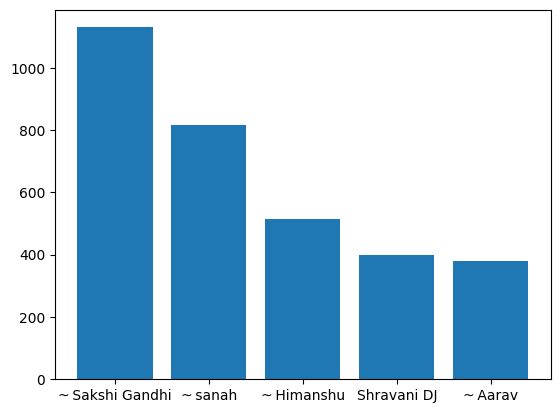

In [22]:
plt.bar(name,count)

In [23]:
round((df['User'].value_counts()/df.shape[0])*100)

User
~ Sakshi Gandhi    17.0
~ sanah            12.0
~ Himanshu          8.0
Shravani DJ         6.0
~ Aarav             6.0
                   ... 
~ Yashraj           0.0
~ Muskan            0.0
~ .                 0.0
Ronak Shukla        0.0
~ Jsejal            0.0
Name: count, Length: 66, dtype: float64

In [24]:
round((df['User'].value_counts()/df.shape[0])*100).reset_index()

,User,count
0,~ Sakshi Gandhi,17.0
1,~ sanah,12.0
2,~ Himanshu,8.0
3,Shravani DJ,6.0
4,~ Aarav,6.0
...,...,...
61,~ Yashraj,0.0
62,~ Muskan,0.0
63,~ .,0.0
64,Ronak Shukla,0.0


In [25]:
round((df['User'].value_counts()/df.shape[0])*100).reset_index().rename(columns={'count':'percentage'})

,User,percentage
0,~ Sakshi Gandhi,17.0
1,~ sanah,12.0
2,~ Himanshu,8.0
3,Shravani DJ,6.0
4,~ Aarav,6.0
...,...,...
61,~ Yashraj,0.0
62,~ Muskan,0.0
63,~ .,0.0
64,Ronak Shukla,0.0


In [68]:
df.head(30)

,Date & Time,Year,Month,Day,Hour,Minute,User,Message
13,20/09/24 11:31:24,2024,September,Friday,11,31,~ Krish,CSE (DS) DIV D3 CHEM AUTOCAD ECS.pdf • ‎1 page...
45,20/09/24 13:35:32,2024,September,Friday,13,35,Keval Shah(dj),Follow this link to join my WhatsApp group: ht...
46,20/09/24 13:35:47,2024,September,Friday,13,35,Keval Shah(dj),Join D3-3
50,20/09/24 13:56:05,2024,September,Friday,13,56,Nitesh Thakur(dj),Kidhar hai lecture????
51,20/09/24 13:56:23,2024,September,Friday,13,56,~ Lavesh,in the lab opp class 21
61,20/09/24 15:23:49,2024,September,Friday,15,23,~ Krish,WATER PPT (Sept-2023).pdf • ‎53 pages ‎docume...
62,20/09/24 15:24:04,2024,September,Friday,15,24,~ Krish,Matrices by Dr. Naresh Vasant Afre Shareable 2...
63,20/09/24 15:25:02,2024,September,Friday,15,25,~ Lavesh,#krishforCR guys
64,20/09/24 15:26:14,2024,September,Friday,15,26,~ Neil Mhatre,+1
66,20/09/24 15:34:26,2024,September,Friday,15,34,Nitesh Thakur(dj),Hamara cr kaisa ho??


In [27]:
df[df['User']!='CSE DS D3(students only)']


,Date & Time,Year,Month,Day,Hour,Minute,User,Message
2,20/09/24 10:30:37,2024,September,Friday,10,30,~ Khush,‎~ Khush was added
3,20/09/24 10:30:37,2024,September,Friday,10,30,~ Krish,‎~ Krish was added
4,20/09/24 10:30:44,2024,September,Friday,10,30,~ Sakshi Gandhi,‎~ Sakshi Gandhi joined using this group's inv...
5,20/09/24 10:30:54,2024,September,Friday,10,30,~ Shruti,‎~ Shruti joined using this group's invite link
6,20/09/24 10:30:55,2024,September,Friday,10,30,~ PREET SHAH,‎~ PREET SHAH joined using this group's invite...
...,...,...,...,...,...,...,...,...
6645,16/01/25 18:36:46,2025,January,Thursday,18,36,Nirman Patel(dj),wait
6646,16/01/25 18:37:18,2025,January,Thursday,18,37,~ nirjall,https://drive.google.com/drive/mobile/folders/...
6647,16/01/25 18:37:29,2025,January,Thursday,18,37,~ nirjall,Chem aur ecs isme hai
6648,16/01/25 18:37:40,2025,January,Thursday,18,37,~ saket,🙏🏼🙏🏼


In [28]:
#df['User'].unique().tolist()

In [69]:

keywords = ["joined using this group", "left the group","was added","added","image omitted"]

# Filter out rows containing unwanted messages
df_cleaned = df[~df["Message"].str.contains("|".join(keywords), na=False, case=False)]

# Display cleaned DataFrame
df_cleaned


,Date & Time,Year,Month,Day,Hour,Minute,User,Message
13,20/09/24 11:31:24,2024,September,Friday,11,31,~ Krish,CSE (DS) DIV D3 CHEM AUTOCAD ECS.pdf • ‎1 page...
45,20/09/24 13:35:32,2024,September,Friday,13,35,Keval Shah(dj),Follow this link to join my WhatsApp group: ht...
46,20/09/24 13:35:47,2024,September,Friday,13,35,Keval Shah(dj),Join D3-3
50,20/09/24 13:56:05,2024,September,Friday,13,56,Nitesh Thakur(dj),Kidhar hai lecture????
51,20/09/24 13:56:23,2024,September,Friday,13,56,~ Lavesh,in the lab opp class 21
...,...,...,...,...,...,...,...,...
6645,16/01/25 18:36:46,2025,January,Thursday,18,36,Nirman Patel(dj),wait
6646,16/01/25 18:37:18,2025,January,Thursday,18,37,~ nirjall,https://drive.google.com/drive/mobile/folders/...
6647,16/01/25 18:37:29,2025,January,Thursday,18,37,~ nirjall,Chem aur ecs isme hai
6648,16/01/25 18:37:40,2025,January,Thursday,18,37,~ saket,🙏🏼🙏🏼


In [39]:
#words

In [31]:
!pip install nltk


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Example list of words

# Remove stop words
filtered_words = [word for word in words if word not in stop_words]

#filtered_words  # Output: ['example', 'text', 'processing']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
x=pd.DataFrame(filtered_words)
x

,0
0,‎Messages
1,calls
2,end-to-end
3,encrypted.
4,No
...,...
25351,pdf
25352,ya
25353,pics
25354,hai


In [34]:
# Filter out rows that contain "image" or "omitted"
df_filtered = df[~x[0].str.contains(r"\b(image|omitted)\b", case=False, na=False, regex=True)]

df_filtered


C:\Users\patil\AppData\Local\Temp\ipykernel_15124\4074494447.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[~x[0].str.contains(r"\b(image|omitted)\b", case=False, na=False, regex=True)]
C:\Users\patil\AppData\Local\Temp\ipykernel_15124\4074494447.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df[~x[0].str.contains(r"\b(image|omitted)\b", case=False, na=False, regex=True)]


,Date & Time,Year,Month,Day,Hour,Minute,User,Message
0,20/09/24 10:30:37,2024,September,Friday,10,30,CSE DS D3(students only),‎Messages and calls are end-to-end encrypted. ...
1,20/09/24 10:30:37,2024,September,Friday,10,30,CSE DS D3(students only),‎You joined using this group's invite link
2,20/09/24 10:30:37,2024,September,Friday,10,30,~ Khush,‎~ Khush was added
3,20/09/24 10:30:37,2024,September,Friday,10,30,~ Krish,‎~ Krish was added
4,20/09/24 10:30:44,2024,September,Friday,10,30,~ Sakshi Gandhi,‎~ Sakshi Gandhi joined using this group's inv...
...,...,...,...,...,...,...,...,...
6645,16/01/25 18:36:46,2025,January,Thursday,18,36,Nirman Patel(dj),wait
6646,16/01/25 18:37:18,2025,January,Thursday,18,37,~ nirjall,https://drive.google.com/drive/mobile/folders/...
6647,16/01/25 18:37:29,2025,January,Thursday,18,37,~ nirjall,Chem aur ecs isme hai
6648,16/01/25 18:37:40,2025,January,Thursday,18,37,~ saket,🙏🏼🙏🏼


In [35]:
filtered_words=[]
for message in df_cleaned['Message']:
    filtered_words.extend(message.split())
    

In [36]:
df_filtered_words=pd.DataFrame(filtered_words)
df_filtered_words

,0
0,‎Messages
1,and
2,calls
3,are
4,end-to-end
...,...
30574,pdf
30575,ya
30576,pics
30577,hai


In [37]:
df_filtered_words.value_counts()

0        
the          532
hai          453
was          387
to           384
message      384
            ... 
boardwork      1
board....      1
board,         1
blooms         1
🫶🏻😊            1
Name: count, Length: 6426, dtype: int64

In [38]:
keywords = ["joined using this group", "left the group", "was added", "added", "image omitted"]

    # Filter out rows containing unwanted messages
df_cleaned = df[~df["Message"].str.contains("|".join(keywords), na=False, case=False)]

    # Display cleaned DataFrame
filtered_words = []
for message in df_cleaned['Message']:
    filtered_words.extend(message.split())

    # Download stopwords if not already downloaded
nltk.download('stopwords')

    # Define stop words
stop_words = set(stopwords.words('english'))

    # Remove stop words
new_filtered_words = [word for word in filtered_words if word not in stop_words]
new_df=pd.DataFrame(new_filtered_words)
new_df=new_df.value_counts().head(20)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [39]:
 df[df["User"] == 'Ronak Shukla']

,Date & Time,Year,Month,Day,Hour,Minute,User,Message
10,20/09/24 10:32:11,2024,September,Friday,10,32,Ronak Shukla,‎You added Ronak Shukla
1432,11/10/24 22:34:13,2024,October,Friday,22,34,Ronak Shukla,Students who have filled the form and complet...
2931,09/11/24 13:22:57,2024,November,Saturday,13,22,Ronak Shukla,BS Grewal- Higher Engineering Mathematics(1).p...


In [40]:
df.columns

Index(['Date & Time', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'User',
       'Message'],
      dtype='object')

In [41]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import emoji

In [43]:
emojis=[]
emojis = []
for message in df['Message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])

In [41]:
#emojis

In [45]:
df_emojis=pd.DataFrame(emojis)
df_emojis=pd.DataFrame(df_emojis.value_counts())
df_emojis.head(10)

,count
0,
😭,263
😂,152
🥳,126
🤣,90
💀,85
🎉,78
🏻,47
✨,38
🎊,37


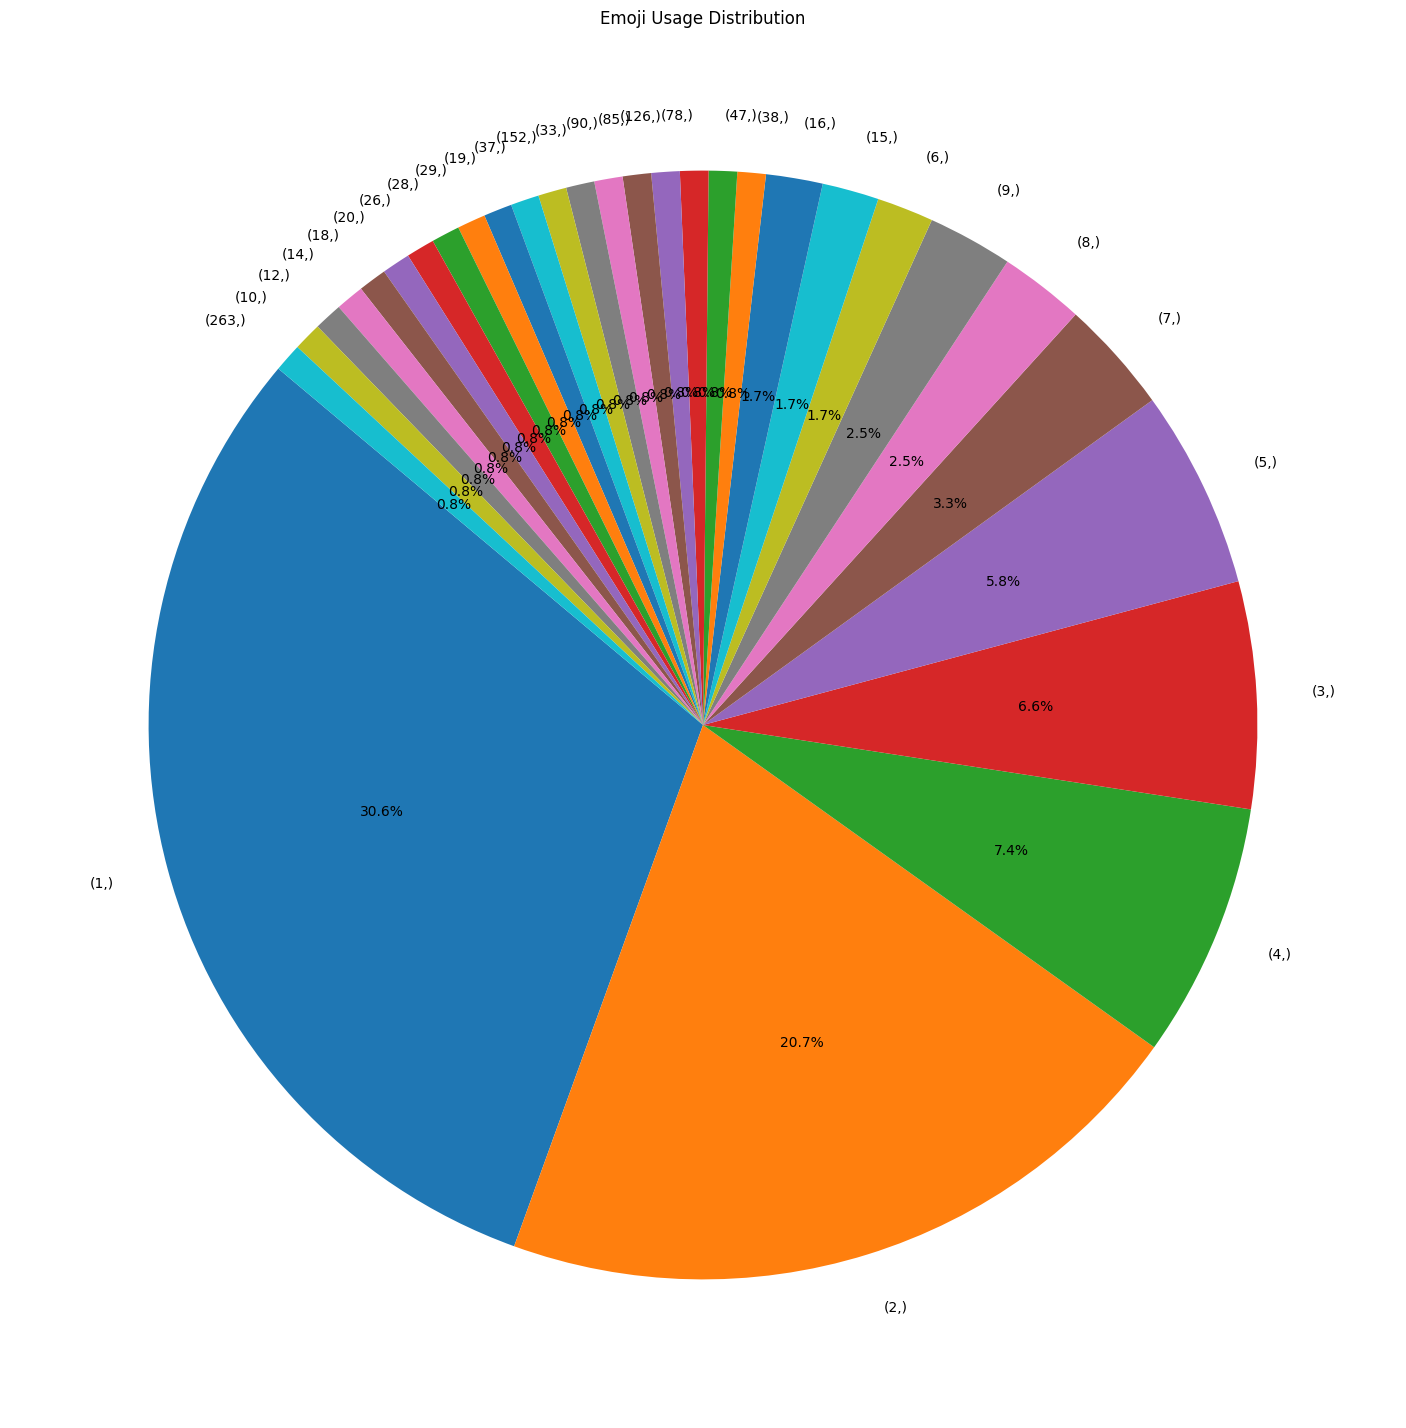

In [46]:
emoji_counts = df_emojis.value_counts()

# Plot pie chart
plt.figure(figsize=(18, 18))
plt.pie(emoji_counts, labels=emoji_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Emoji Usage Distribution")
plt.show()

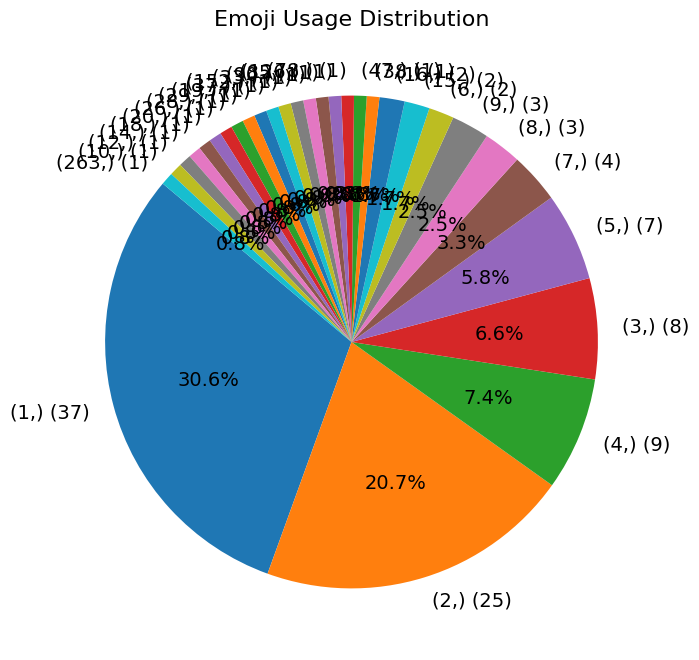

In [47]:
plt.figure(figsize=(8, 8))
plt.pie(
    emoji_counts, 
    labels=[f"{emoji} ({count})" for emoji, count in zip(emoji_counts.index, emoji_counts.values)], 
    autopct='%1.1f%%', 
    startangle=140,
    textprops={'fontsize': 14}  # Increase font size for better visibility
)
plt.title("Emoji Usage Distribution", fontsize=16)
plt.show()

In [48]:
df.head()

,Date & Time,Year,Month,Day,Hour,Minute,User,Message
0,20/09/24 10:30:37,2024,September,Friday,10,30,CSE DS D3(students only),‎Messages and calls are end-to-end encrypted. ...
1,20/09/24 10:30:37,2024,September,Friday,10,30,CSE DS D3(students only),‎You joined using this group's invite link
2,20/09/24 10:30:37,2024,September,Friday,10,30,~ Khush,‎~ Khush was added
3,20/09/24 10:30:37,2024,September,Friday,10,30,~ Krish,‎~ Krish was added
4,20/09/24 10:30:44,2024,September,Friday,10,30,~ Sakshi Gandhi,‎~ Sakshi Gandhi joined using this group's inv...


In [49]:
df.groupby(['Month', 'Year'])['Message'].count()


Month      Year
December   2024    1272
January    2025     725
November   2024    2073
October    2024    1520
September  2024    1060
Name: Message, dtype: int64

In [50]:
timeline=df.groupby(['Month', 'Year'])['Message'].count().reset_index()
timeline


,Month,Year,Message
0,December,2024,1272
1,January,2025,725
2,November,2024,2073
3,October,2024,1520
4,September,2024,1060


In [51]:
time=[]
for i in range(timeline.shape[0]):
    print(timeline['Month'][i]+"-"+str(timeline['Year'][i]))

December-2024
January-2025
November-2024
October-2024
September-2024


In [52]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['Month'][i]+"-"+str(timeline['Year'][i]))
timeline['time']=time

In [53]:
timeline

,Month,Year,Message,time
0,December,2024,1272,December-2024
1,January,2025,725,January-2025
2,November,2024,2073,November-2024
3,October,2024,1520,October-2024
4,September,2024,1060,September-2024


([0, 1, 2, 3, 4],
 [Text(0, 0, 'December-2024'),
  Text(1, 0, 'January-2025'),
  Text(2, 0, 'November-2024'),
  Text(3, 0, 'October-2024'),
  Text(4, 0, 'September-2024')])

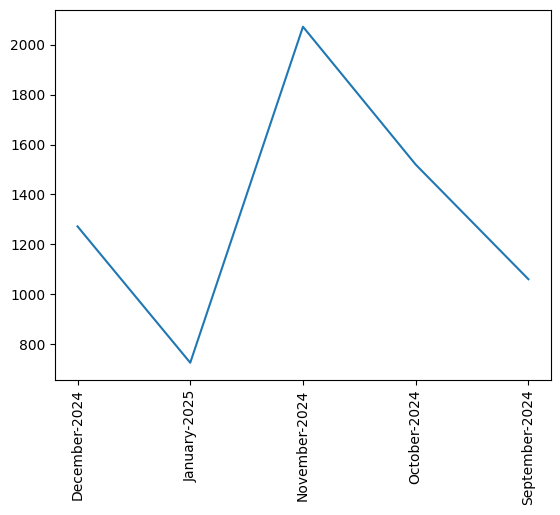

In [54]:
plt.plot(timeline['time'],timeline['Message'])
plt.xticks(rotation='vertical')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

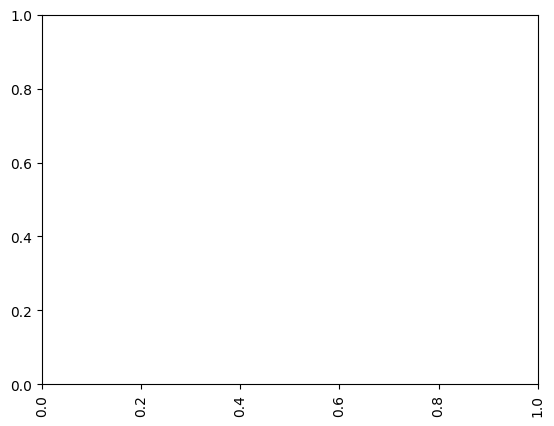

In [55]:
plt.xticks(rotation='vertical')

In [56]:
df.head()

,Date & Time,Year,Month,Day,Hour,Minute,User,Message
0,20/09/24 10:30:37,2024,September,Friday,10,30,CSE DS D3(students only),‎Messages and calls are end-to-end encrypted. ...
1,20/09/24 10:30:37,2024,September,Friday,10,30,CSE DS D3(students only),‎You joined using this group's invite link
2,20/09/24 10:30:37,2024,September,Friday,10,30,~ Khush,‎~ Khush was added
3,20/09/24 10:30:37,2024,September,Friday,10,30,~ Krish,‎~ Krish was added
4,20/09/24 10:30:44,2024,September,Friday,10,30,~ Sakshi Gandhi,‎~ Sakshi Gandhi joined using this group's inv...


In [57]:
# Convert "Date & Time" column to datetime format
df["Date & Time"] = pd.to_datetime(df["Date & Time"], format="%d/%m/%y %H:%M:%S")

# Create a new "Date" column
df["Date"] = df["Date & Time"].dt.date  # Extract only the date


In [58]:
df

,Date & Time,Year,Month,Day,Hour,Minute,User,Message,Date
0,2024-09-20 10:30:37,2024,September,Friday,10,30,CSE DS D3(students only),‎Messages and calls are end-to-end encrypted. ...,2024-09-20
1,2024-09-20 10:30:37,2024,September,Friday,10,30,CSE DS D3(students only),‎You joined using this group's invite link,2024-09-20
2,2024-09-20 10:30:37,2024,September,Friday,10,30,~ Khush,‎~ Khush was added,2024-09-20
3,2024-09-20 10:30:37,2024,September,Friday,10,30,~ Krish,‎~ Krish was added,2024-09-20
4,2024-09-20 10:30:44,2024,September,Friday,10,30,~ Sakshi Gandhi,‎~ Sakshi Gandhi joined using this group's inv...,2024-09-20
...,...,...,...,...,...,...,...,...,...
6645,2025-01-16 18:36:46,2025,January,Thursday,18,36,Nirman Patel(dj),wait,2025-01-16
6646,2025-01-16 18:37:18,2025,January,Thursday,18,37,~ nirjall,https://drive.google.com/drive/mobile/folders/...,2025-01-16
6647,2025-01-16 18:37:29,2025,January,Thursday,18,37,~ nirjall,Chem aur ecs isme hai,2025-01-16
6648,2025-01-16 18:37:40,2025,January,Thursday,18,37,~ saket,🙏🏼🙏🏼,2025-01-16


In [59]:
df1=df.groupby(['Date'])['Message'].count().reset_index()
df1

,Date,Message
0,2024-09-20,186
1,2024-09-21,45
2,2024-09-22,4
3,2024-09-23,28
4,2024-09-24,38
...,...,...
113,2025-01-12,18
114,2025-01-13,10
115,2025-01-14,8
116,2025-01-15,9


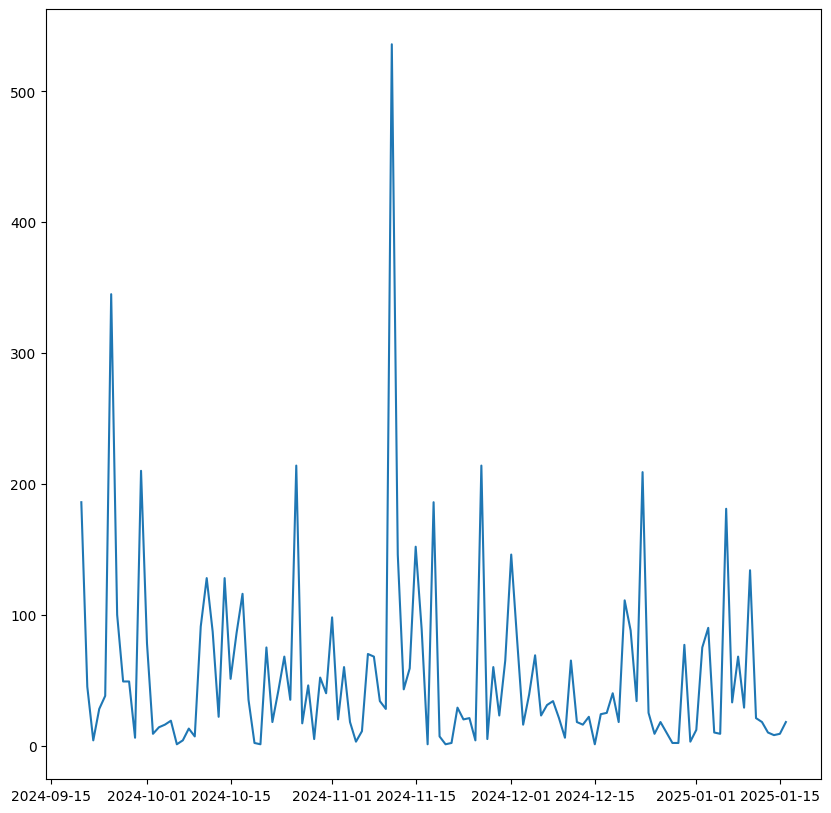

In [60]:
plt.figure(figsize=(10,10))
plt.plot(df1['Date'],df1['Message'])

In [75]:
# ✅ Convert "Date" column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# ✅ Add a new column with day names
df["Day_name"] = df["Date"].dt.day_name()
df2=df['Date'].dt.month_name().value_counts().reset_index().rename(columns={'count':'Message','Date':'Month'})
df2

,Month,Message
0,November,2073
1,October,1520
2,December,1272
3,September,1060
4,January,725


In [69]:
df1=df['Day_name'].value_counts().reset_index()
df1

,Day_name,count
0,Monday,1837
1,Friday,1193
2,Thursday,865
3,Wednesday,843
4,Saturday,818
5,Tuesday,689
6,Sunday,405


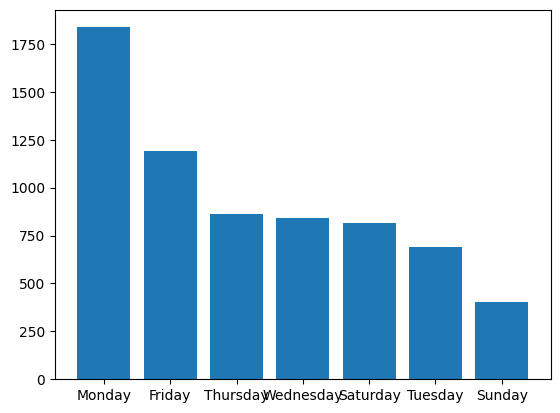

In [70]:
plt.bar(df1['Day_name'],df1['count'])
plt.show()

In [ ]:
#

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Message: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. | Sentiment Score: {'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'compound': -0.296}
Message: ‎You joined using this group's invite link | Sentiment Score: {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.1531}
Message: ‎~ Sakshi Gandhi joined using this group's invite link | Sentiment Score: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.1531}
Message: ‎~ Shruti joined using this group's invite link | Sentiment Score: {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.1531}
Message: ‎~ PREET SHAH joined using this group's invite link | Sentiment Score: {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.1531}
Message: ‎~ Dil Kuch Kahe.... joined using this group's invite link | Sentiment Score: {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.1531}
Message: ‎You're now an admin | Sentiment Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

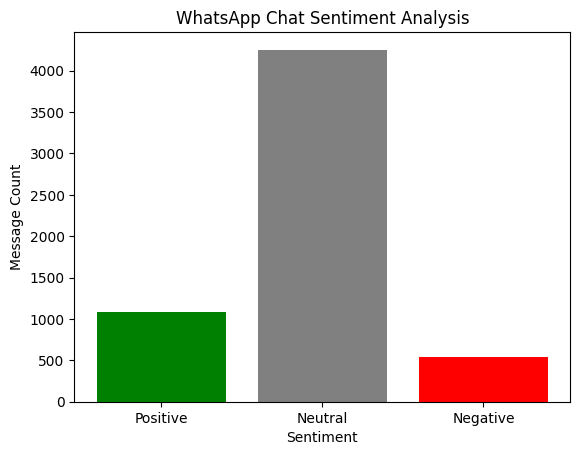

In [44]:
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER Lexicon (needed for sentiment analysis)
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()



# Sentiment counters
positive, neutral, negative = 0, 0, 0

# Process chat messages
for message in df['Message']:

    # Perform sentiment analysis
    score = sia.polarity_scores(message)
    
    if score['compound'] >= 0.05:
        positive += 1
    elif score['compound'] <= -0.05:
        negative += 1
    else:
        neutral += 1

    print(f"Message: {message} | Sentiment Score: {score}")

# Print sentiment analysis results
print(f"\nSentiment Analysis Results:")
print(f"Positive Messages: {positive}")
print(f"Neutral Messages: {neutral}")
print(f"Negative Messages: {negative}")

# Visualize the sentiment distribution
labels = ['Positive', 'Neutral', 'Negative']
values = [positive, neutral, negative]

plt.bar(labels, values, color=['green', 'gray', 'red'])
plt.xlabel("Sentiment")
plt.ylabel("Message Count")
plt.title("WhatsApp Chat Sentiment Analysis")
plt.show()


In [48]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2025-02-14 22:52:39.907 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 22:52:40.121 
  command:

    streamlit run C:\Users\patil\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-14 22:52:40.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 22:52:40.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 22:52:40.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 22:52:40.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 22:52:40.134 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-14 22:52:40.134 Thre

DeltaGenerator()

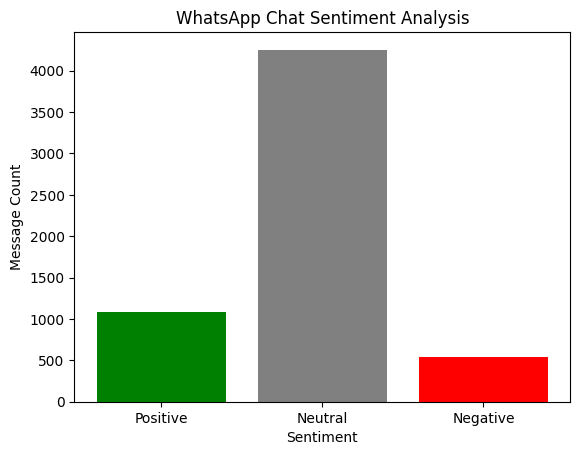

In [49]:
    import streamlit as st
    # Sentiment counters
    positive, neutral, negative = 0, 0, 0
    processed_messages = []

    # Process Chat Messages
    for message in df['Message']:
        # Perform sentiment analysis
        score = sia.polarity_scores(message)
        sentiment = "Neutral"
        if score['compound'] >= 0.05:
            sentiment = "Positive"
            positive += 1
        elif score['compound'] <= -0.05:
            sentiment = "Negative"
            negative += 1
        else:
            neutral += 1

        processed_messages.append([message, sentiment])

    # Convert to DataFrame
    df = pd.DataFrame(processed_messages, columns=["Message", "Sentiment"])

    # Display Results
    st.subheader("📌 Sentiment Analysis Results")
    st.write(f"**Positive Messages:** {positive}")
    st.write(f"**Neutral Messages:** {neutral}")
    st.write(f"**Negative Messages:** {negative}")

    # Display Chat Data with Sentiment
    st.subheader("📝 Processed Chat Messages")
    st.dataframe(df)

    # Visualization
    st.subheader("📊 Sentiment Distribution")
    fig, ax = plt.subplots()
    labels = ["Positive", "Neutral", "Negative"]
    values = [positive, neutral, negative]
    ax.bar(labels, values, color=['green', 'gray', 'red'])
    ax.set_xlabel("Sentiment")
    ax.set_ylabel("Message Count")
    ax.set_title("WhatsApp Chat Sentiment Analysis")
    st.pyplot(fig)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Classified Users:
                 User  Avg Sentiment  Sentiment Scaled  Cluster
0             ~ Krish       0.042763         -0.401529        1
1      Keval Shah(dj)       0.312517          1.420586        2
2   Nitesh Thakur(dj)       0.034673         -0.456174        1
3            ~ Lavesh       0.041557         -0.409672        1
4       ~ Neil Mhatre       0.054118         -0.324827        1
..                ...            ...               ...      ...
61      ~ VEER DODIYA       0.522475          2.838799        2
62            ~ Dhruv       0.119316          0.115568        1
63    Omkar  Kudalkar       0.067487         -0.234527        1
64          ~ Yashraj       0.226300          0.838215        2
65            ~ Darsh       0.000000         -0.690381        1

[66 rows x 4 columns]


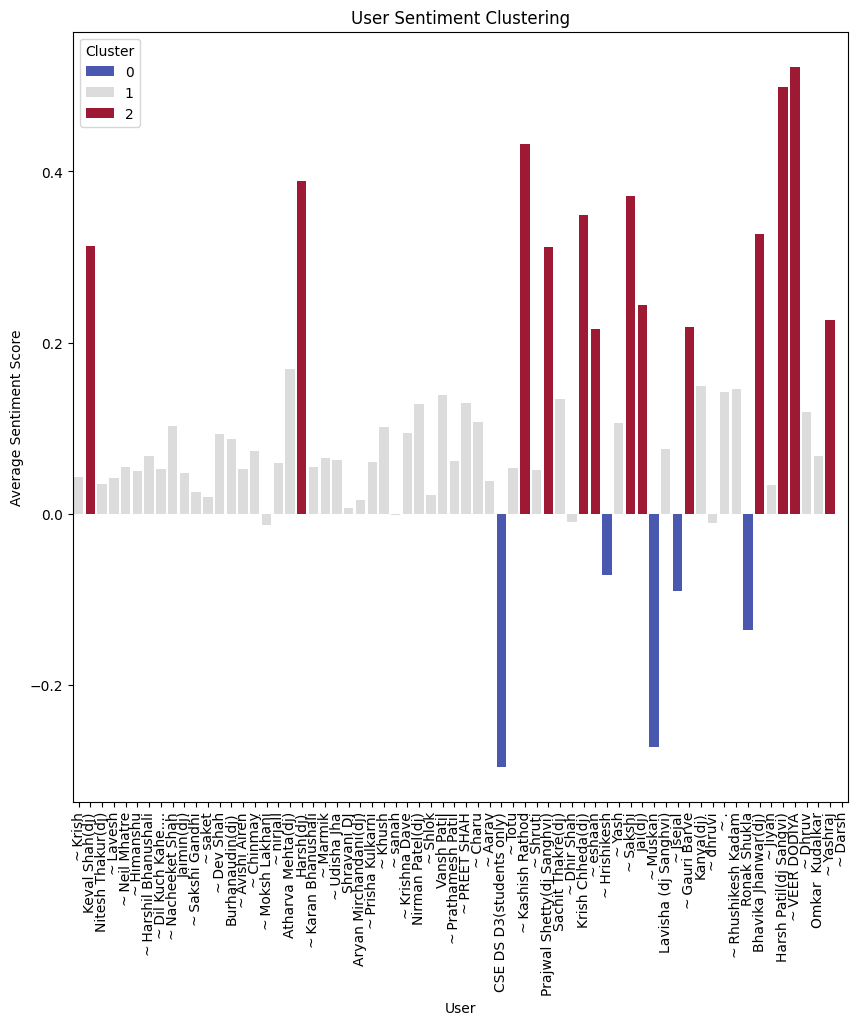

In [72]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK Vader Lexicon
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()


# Dictionary to store user sentiments
user_sentiments = {}

# Process Chat Messages
for user, message in zip(df['User'], df['Message']):
    # Perform sentiment analysis
    score = sia.polarity_scores(message)
    sentiment = score['compound']  # Compound Score (-1 to +1)

    # Store user sentiment scores
    if user not in user_sentiments:
        user_sentiments[user] = []
    user_sentiments[user].append(sentiment)

# Convert user sentiment data to DataFrame
user_df = pd.DataFrame({
    "User": list(user_sentiments.keys()),
    "Avg Sentiment": [sum(scores) / len(scores) for scores in user_sentiments.values()]
})

# Normalize Data
scaler = StandardScaler()
user_df["Sentiment Scaled"] = scaler.fit_transform(user_df[["Avg Sentiment"]])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
user_df["Cluster"] = kmeans.fit_predict(user_df[["Sentiment Scaled"]])

# Display Classified Users
print("\nClassified Users:")
print(user_df)

# Visualization
plt.figure(figsize=(10, 10))
sns.barplot(x=user_df["User"], y=user_df["Avg Sentiment"], hue=user_df["Cluster"], palette="coolwarm")
plt.xlabel("User")
plt.ylabel("Average Sentiment Score")
plt.title("User Sentiment Clustering")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.show()
